In [ ]:
# Import libraries
import math as mt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
import requests
import re
import json
from bs4 import BeautifulSoup


### Step 1 Data analize for Chicago weather on Nov 2017

Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'

El nombre del DataFrame debe ser weather_records y tienes que especificarlo cuando buscas: attrs={"id": "weather_records"} . Imprime el DataFrame completo.

In [3]:
# Get the web information using get
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'

req = requests.get(URL)

print(req.text)

<html>
<head>
    <link rel="stylesheet" href="./styles.css">
    <title>
        Festival News
    </title>
</head>
<body>
<h2>Chicago Weather Records, November 2017</h2>
       <table border="1" class="dataframe" id="weather_records">
  <thead>
    <tr style="text-align: right;">
      <th>Date and time</th>
      <th>Temperature</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2017-11-01 00:00:00</td>
      <td>276.150</td>
      <td>broken clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 01:00:00</td>
      <td>275.700</td>
      <td>scattered clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 02:00:00</td>
      <td>275.610</td>
      <td>overcast clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 03:00:00</td>
      <td>275.350</td>
      <td>broken clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 04:00:00</td>
      <td>275.240</td>
      <td>broken clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 05:00:00</td>
      <td>275.050</td>
 

In [4]:
# Create variable to analize the data 
soup = BeautifulSoup(req.text, 'lxml')

# Create a variable to create the table with the data required
table = soup.find('table', attrs={'id': "weather_records"})

print(table)

<table border="1" class="dataframe" id="weather_records">
<thead>
<tr style="text-align: right;">
<th>Date and time</th>
<th>Temperature</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>2017-11-01 00:00:00</td>
<td>276.150</td>
<td>broken clouds</td>
</tr>
<tr>
<td>2017-11-01 01:00:00</td>
<td>275.700</td>
<td>scattered clouds</td>
</tr>
<tr>
<td>2017-11-01 02:00:00</td>
<td>275.610</td>
<td>overcast clouds</td>
</tr>
<tr>
<td>2017-11-01 03:00:00</td>
<td>275.350</td>
<td>broken clouds</td>
</tr>
<tr>
<td>2017-11-01 04:00:00</td>
<td>275.240</td>
<td>broken clouds</td>
</tr>
<tr>
<td>2017-11-01 05:00:00</td>
<td>275.050</td>
<td>overcast clouds</td>
</tr>
<tr>
<td>2017-11-01 06:00:00</td>
<td>275.140</td>
<td>overcast clouds</td>
</tr>
<tr>
<td>2017-11-01 07:00:00</td>
<td>275.230</td>
<td>overcast clouds</td>
</tr>
<tr>
<td>2017-11-01 08:00:00</td>
<td>275.230</td>
<td>overcast clouds</td>
</tr>
<tr>
<td>2017-11-01 09:00:00</td>
<td>275.320</td>
<td>overcast clouds</td>
</tr>

In [5]:
# Create empty list to store the headings
heading_table = []

# Search headings and store them in the empty list
for row in table.find_all('th'):
    heading_table.append(row.text)

print(heading_table)

['Date and time', 'Temperature', 'Description']


In [6]:
# Create empty list to store the content data
content = []

# Search content and store in the empty list
# Loop through each row in the tr label
for row in table.find_all('tr'):
    # Ignores the first headers
    if not row.find_all('th'):
        # Loop through all elements 'td' to extract all content and add to the content variable
        content.append([element.text for element in row.find_all('td')])

print(content)

[['2017-11-01 00:00:00', '276.150', 'broken clouds'], ['2017-11-01 01:00:00', '275.700', 'scattered clouds'], ['2017-11-01 02:00:00', '275.610', 'overcast clouds'], ['2017-11-01 03:00:00', '275.350', 'broken clouds'], ['2017-11-01 04:00:00', '275.240', 'broken clouds'], ['2017-11-01 05:00:00', '275.050', 'overcast clouds'], ['2017-11-01 06:00:00', '275.140', 'overcast clouds'], ['2017-11-01 07:00:00', '275.230', 'overcast clouds'], ['2017-11-01 08:00:00', '275.230', 'overcast clouds'], ['2017-11-01 09:00:00', '275.320', 'overcast clouds'], ['2017-11-01 10:00:00', '275.230', 'overcast clouds'], ['2017-11-01 11:00:00', '275.510', 'overcast clouds'], ['2017-11-01 12:00:00', '275.690', 'overcast clouds'], ['2017-11-01 13:00:00', '275.790', 'overcast clouds'], ['2017-11-01 14:00:00', '275.850', 'broken clouds'], ['2017-11-01 15:00:00', '276.600', 'broken clouds'], ['2017-11-01 16:00:00', '277.540', 'sky is clear'], ['2017-11-01 17:00:00', '278.320', 'overcast clouds'], ['2017-11-01 18:00:00

In [7]:
# Create DataFrame by passing the 2 variables created as arguments
weather_records = pd.DataFrame(content, columns=heading_table)

# Optional code w/o using the variables content, heading_table
#weather_records = pd.read_html(str(table))[0]

print(weather_records.head())

         Date and time Temperature       Description
0  2017-11-01 00:00:00     276.150     broken clouds
1  2017-11-01 01:00:00     275.700  scattered clouds
2  2017-11-01 02:00:00     275.610   overcast clouds
3  2017-11-01 03:00:00     275.350     broken clouds
4  2017-11-01 04:00:00     275.240     broken clouds


### Step 2 Exploratory data analysis


1. Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.


SELECT 
    cabs.company_name,
    COUNT(*) AS trips_amount
FROM 
    trips
    INNER JOIN cabs ON cabs.cab_id = trips.cab_id
WHERE 
    CAST(trips.start_ts AS date) IN ('2017-11-15', '2017-11-16')
GROUP BY 
    cabs.company_name
ORDER BY 
    trips_amount DESC;
    

Resultado
company_name	            trips_amount
Flash Cab	                19558
Taxi Affiliation Services	11422
Medallion Leasin	        10367
Yellow Cab	                9888

2. Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

Junta las tablas cabs y trips. Puedes hacer cálculos para un grupo de empresas (por ejemplo, aquellas cuyo nombre contiene la palabra "Yellow"), luego para el otro y finalmente agrupar los resultados.

El resultado final debería tener este aspecto:

company_name	trips_amount
Taxi Affiliation Service Yellow	29213
Yellow Cab	33668

SELECT 
    cabs.company_name,
    COUNT(*) AS trips_amount
FROM 
    trips
    INNER JOIN cabs ON cabs.cab_id = trips.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND (cabs.company_name ILIKE '%Yellow%' OR cabs.company_name ILIKE '%Blue%')
GROUP BY 
    cabs.company_name
ORDER BY 
    trips_amount DESC;


company_name	                    trips_amount
Yellow Cab	                        33668
Taxi Affiliation Service Yellow	    29213
Blue Ribbon Taxi Association Inc.	17675
Blue Diamond	                    6764


3. Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services.

Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". 

Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

SELECT 
    CASE 
        WHEN cabs.company_name ILIKE '%Flash Cab%' THEN 'Flash Cab'
        WHEN cabs.company_name ILIKE '%Taxi Affiliation Services%' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(*) AS trips_amount
FROM 
    trips
    INNER JOIN cabs ON cabs.cab_id = trips.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY 
    company
ORDER BY 
    trips_amount DESC;

Resultado
company	                    trips_amount
Other	                    335771
Flash Cab	                64084
Taxi Affiliation Services	37583

### Step 3 Hypotesis test trips duration from Loop to O'Hare. 

Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

Utiliza la condición name LIKE '%Hare' OR name LIKE 'Loop'

El resultado final debería tener este aspecto:

neighborhood_id	name
50	Loop
63	O'Hare

SELECT 
    neighborhood_id AS id_identifiers,
    name AS name
FROM 
    neighborhoods
WHERE 
    name LIKE '%Hare%'
    OR name LIKE 'Loop'
GROUP BY 
    neighborhood_id;

Resultado
id_identifiers	name
50	            Loop
63	            O'Hare

5. Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

Utiliza los operadores CASE, LIKE y OR.

Las primeras filas de la tabla resultante deberían ser así:

ts	                weather_conditions
2017-11-01 00:00:00	Good
2017-11-01 01:00:00	Good
2017-11-01 02:00:00	Good

SELECT 
    ts,
    CASE
        WHEN weather_records.description LIKE '%rain%' OR weather_records.description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM 
    weather_records
ORDER BY 
    ts;

ts	                weather_conditions
2017-11-01 00:00:00	Good
2017-11-01 01:00:00	Good
2017-11-01 02:00:00	Good
2017-11-01 03:00:00	Good
2017-11-01 04:00:00	Good
2017-11-01 05:00:00	Good ...

6. Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Las columnas de la tabla deben estar en el siguiente orden:

start_ts
weather_conditions
duration_seconds
Ordena por trip_id.

Usa INNER JOIN y aplica EXTRACT (DOW from trips.start_ts) = 6 para recuperar datos sobre los viajes de los sábados.

Las primeras filas de la tabla resultante deberían ser así:

start_ts	weather_conditions	duration_seconds
2017-11-25 12:00:00	Good	1380
2017-11-25 16:00:00	Good	2410
2017-11-25 14:00:00	Good	1920
2017-11-25 12:00:00	Good	1543
2017-11-04 10:00:00	Good	2512

SELECT 
    trips.start_ts,
    CASE
        WHEN weather_records.description LIKE '%rain%' OR weather_records.description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions,
    trips.duration_seconds
FROM 
    trips
    INNER JOIN weather_records ON weather_records.ts = trips.start_ts
WHERE 
    EXTRACT(DOW FROM trips.start_ts) = 6
    AND pickup_location_id = 50
    AND dropoff_location_id = 63
ORDER BY 
    trips.trip_id;

start_ts	        weather_conditions	duration_seconds
2017-11-25 12:00:00	Good	            1380
2017-11-25 16:00:00	Good	            2410
2017-11-25 14:00:00	Good	            1920
2017-11-25 12:00:00	Good	            1543
2017-11-04 10:00:00	Good	            2512
2017-11-11 07:00:00	Good	            1440

### Paso 4. Análisis exploratorio de datos (Python)

Para estos dos datasets ahora necesitas:

    - importar los archivos
    - estudiar los datos que contienen
    - asegurarte de que los tipos de datos sean correctos
    - identificar los 10 principales barrios en términos de finalización
    - hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
    - sacar conclusiones basadas en cada gráfico y explicar los resultados

In [ ]:
# Open csv files
trips_df = pd.read_csv('moved_project_sql_result_01.csv')
destination_df = pd.read_csv('moved_project_sql_result_04.csv')

# content preview
print('Vista general del dataset trips\n')
display(trips_df.head())
print('\nInformacion general del dataset trips\n')
print(trips_df.info())

print('\nVista general del dataset destination\n')
display(destination_df.head())
print('\nInformacion general del dataset destination\n')
print(destination_df.info())

# No datatype, null or duplicate information to modify



Vista general del dataset trips



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299



Informacion general del dataset trips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Vista general del dataset destination



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000



Informacion general del dataset destination

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [14]:
# Identificar los 10 principales destinos
top_10_destinations = destination_df.sort_values(by='average_trips', ascending=False).head(10)
display(top_10_destinations)


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Grafico de barras de empresas de taxis y numero de viajes



C:\Users\jovan\AppData\Local\Temp\ipykernel_35284\647736220.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


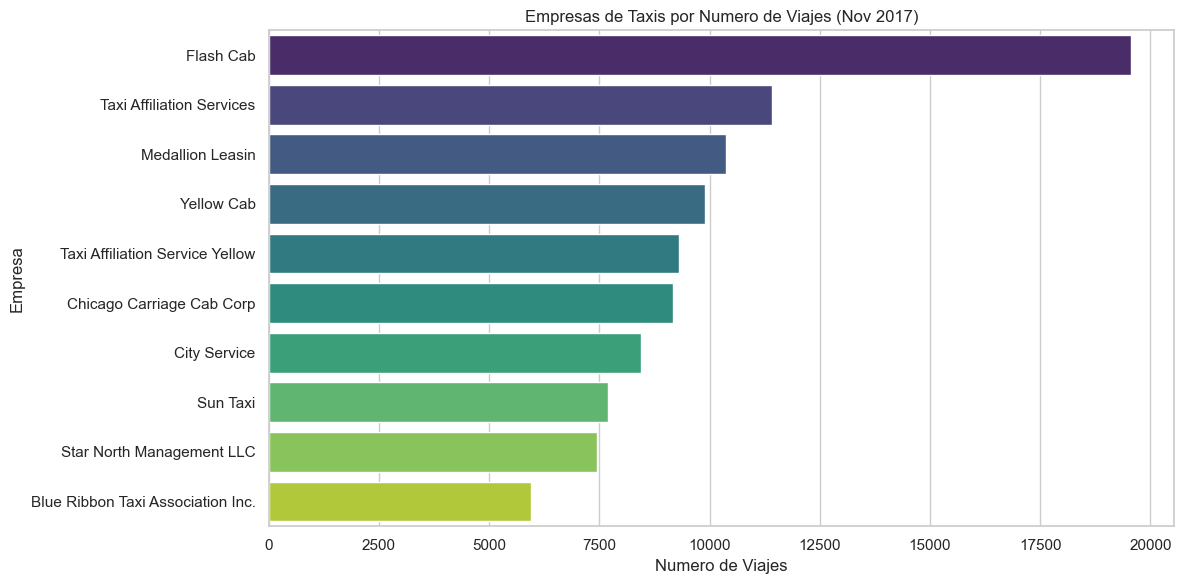

C:\Users\jovan\AppData\Local\Temp\ipykernel_35284\647736220.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


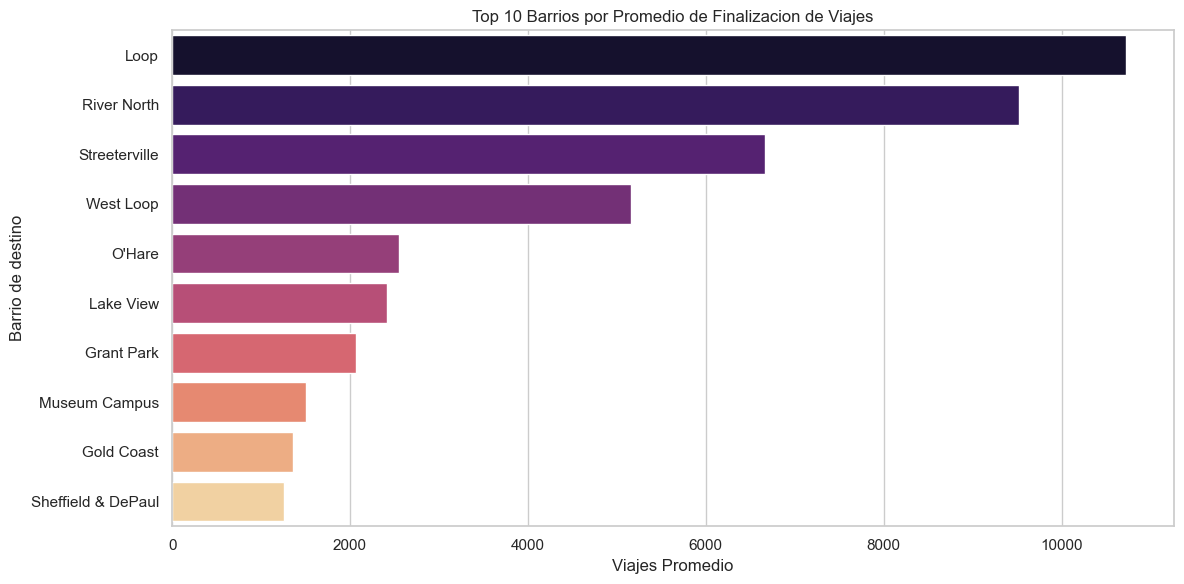

C:\Users\jovan\AppData\Local\Temp\ipykernel_35284\647736220.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


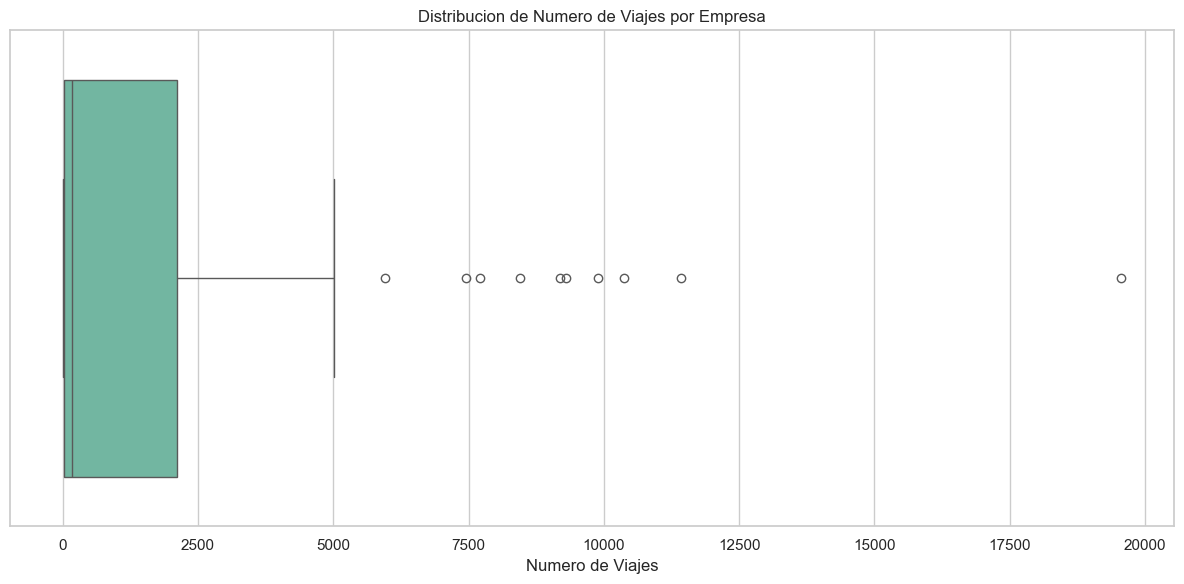

In [15]:
# Grafico de barras de empresas de taxis y numero de viajes
print("Grafico de barras de empresas de taxis y numero de viajes\n")

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))

top_10_cab_companies = trips_df.sort_values(by='trips_amount', ascending=False).head(10)

sns.barplot(
    data=top_10_cab_companies,
    x='trips_amount',
    y='company_name',
    palette='viridis'
)

plt.title('Empresas de Taxis por Numero de Viajes (Nov 2017)')
plt.xlabel('Numero de Viajes')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()

# Grafico de barras de los 10 destinos principales

plt.figure(figsize=(12,6))

sns.barplot(
    data=top_10_destinations,
    x='average_trips',
    y='dropoff_location_name',
    palette='magma'
)

plt.title('Top 10 Barrios por Promedio de Finalizacion de Viajes')
plt.xlabel('Viajes Promedio')
plt.ylabel('Barrio de destino')
plt.tight_layout()
plt.show()

# Diagrama de caja viajes por empresa
plt.figure(figsize=(12,6))

sns.boxplot(
    data=trips_df,
    x='trips_amount',
    palette='Set2'
)

plt.title('Distribucion de Numero de Viajes por Empresa')
plt.xlabel('Numero de Viajes')
plt.tight_layout()
plt.show()

Conclusiones

grafico 1 
    Grafico de barras de empresas de taxis y numero de viajes

    Aqui podemos notar que la empresa Flash Cab tiene el mayor numero de viajes con aproximadamente 19,000, seguido de la empresa Taxi Affiliation Services que tine aproximadamente unos 11,500 viajes, el resto de las empresas de taxis estan mas en los mismos numeros que el segundo lugar, asi que podemos ver que Flash Cab domina los viajes en Noviembre de 2017.

grafico 2
    Top 10 Barrios por Promedio de Finalizacion de Viajes

    Aqui podemos notar que el destino promedio mas visitado es Loop, con poco mas de 10,000 viajes, seguido de River North con aproximadamente 9,500 viajes y Streeterville con poco mas de 6,500 viajes, a la gente le gusta visitar Loop.

Grafico 3
    Distribucion de Numero de Viajes por Empresa

    En esta grafica podemos observar que pocas empresas tienen valores extremos en numero de viajes como lo pudimos constatar en la primera grafica, la gran mayoria de las empresas de taxis tinen menos de 2500 viajes comparadas con las 10 mayores empresas que tiene apartir de aproximadamente 5,500 viajes.